***
* [Outline](0_introduction.ipynb)
* [Glossary](1_glossary.ipynb)
* [0. Introduction](#)
    * Previous Chapter: [prev](../3_Positional_Astronomy/3_0_introduction.ipynb)
    * Next: [next](4_1_The_Baseline.ipynb)
***

# A brief introduction to interferometry and its history
Main author: Oleg Smirnov

In [2]:
from IPython.core.display import HTML
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline
styles = open("../style/course.css", "r").read()
HTML(styles)

## The double-slit experiment
The basics of interferometry date back to Thomas Young's double-slit experiment of 1801 (
https://en.wikipedia.org/wiki/Double-slit_experiment). In thsi experiment, a plate pierced by two parallel slits is illuminated by a monochromatic source of light. Due to the wave-like nature of light, the waves passing through the two slits *interfere*, resulting in an *interference pattern*, or *fringe*, projected onto a screen behind the slits:

<img src="figures/514px-Doubleslit.svg.png" width="50%"/>

The position on the screen $P$ determines the phase difference between the two arriving wavefronts. Waves arriving in phase interfere constructively and produce bright strips in the interference pattern. Waves arriving out of phase interfere destructively and result in dark strips in the pattern.

In this section we'll construct a toy model of a dual-slit experiment. Note that this model is not really physically accurate, it is literally just a "toy" to help us get some intuition for what's going on. A proper description of interfering electromagnetic waves will follow later. 

Firstly, consider that, simlistically, a monochromatic electromagnetic wave with wavelength $\lambda$ can be described by a complex quantity with an amplitude and an instantaneous phase, $A\mathrm{e}^{\imath\phi}$. For simplicity, let us assume a constant amplitude $A$, while the phase of course varies as a function of time and position. If the same wave travels along two paths of different lengths and recombines at point $P$, the resulting electric field is a sum:

$E=A\mathrm{e}^{\imath\phi}+A\mathrm{e}^{\imath(\phi-\phi_0)},$

where the phase delay $\phi_0$ corresponds to the pathlength difference $\tau_0$:

$\phi_0 = 2\pi\tau_0/\lambda.$

What is actually "measured" on the screen, the ***brightness***, is, physically, a time-averaged electric field intensity $EE^*$ (this exactly what our eyes, or a photographic plate, or a detector in the camera perceive as "brightness"). We can work this out as

$
EE^* = (A\mathrm{e}^{\imath\phi}+A\mathrm{e}^{\imath(\phi-\phi_0)})(A\mathrm{e}^{-\imath\phi}+A\mathrm{e}^{-\imath(\phi-\phi_0)}) = 2 A^2 + A^2( \mathrm{e}^{\imath\phi_0} + \mathrm{e}^{-\imath\phi_0} ) = 2 A^2 + 2 A^2 \cos{\phi_0}.
$

Note how phase itself has dropped out, and the only thing that's left is the phase difference $\phi_0$. The first part of the sum is a constant, while the second part varies with phase difference $\phi_0$, which in turn depends on position on the screen $P$. It is easy to see that the resulting intensity $EE^*$ is a purely real quantity that varies from 0 to $4A^2$. This is exactly what produces the alternating bright and dark stripes on the screen.


## A toy double-slit simulator
Let us write a short Python function to (very simplistically) simulate a double-slit experiment:

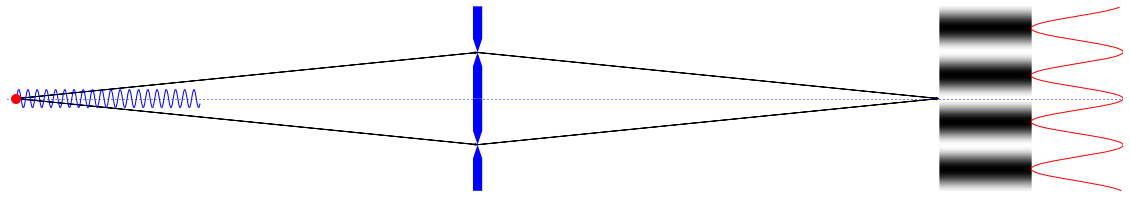

In [3]:
def double_slit (x0=[0],a0=[1],baseline=1,d1=5,d2=5,wavelength=.1,maxint=None):
    """Renders a toy dual-slit experiment.
    'x0' is a list or array of source positions along the x (vertical) axis
    'a0' is an array of source intensities 
    'baseline' is the distance between the slits 
    'd1' and 'd2' are distances between source and plate and plate and screen
    'wavelength' is wavelength
    'maxint' is the maximum intensity scale use to render the fringe pattern. If None, the pattern
       is auto-scaled. Maxint is useful if you want to render fringes from multiple invocations
       of double_slit() into the same intensity scale, i.e. for comparison.
    """
    ## setup figure and axes
    plt.figure(figsize=(20, 5))
    plt.axes(frameon=False)
    plt.xlim(-d1-.1, d2+2) and plt.ylim(-1, 1)
    plt.xticks([]) and plt.yticks([])
    plt.axhline(0, ls=':')
    baseline /= 2.
    ## draw representation of slits
    plt.arrow(0, 1,0, baseline-1, lw=0, width=.1, head_width=.1, length_includes_head=True)
    plt.arrow(0,-1,0, 1-baseline, lw=0, width=.1, head_width=.1, length_includes_head=True)
    plt.arrow(0, 0,0,  baseline,  lw=0, width=.1, head_width=.1, length_includes_head=True)
    plt.arrow(0, 0,0, -baseline,  lw=0, width=.1, head_width=.1, length_includes_head=True)
    ## draw representation of lightpath from slits to centre of screen
    plt.arrow(0, baseline,d2,-baseline, length_includes_head=True)
    plt.arrow(0,-baseline,d2, baseline, length_includes_head=True)
    ## draw representation of wave
    xw = np.arange(-d1, -d1+(d1+d2)/4, .01)
    yw = np.sin(2*np.pi*xw/wavelength)*.1 + x0[len(x0)/2]
    plt.plot(xw,yw,'b')
    ## 'xs' is a vector of x cordinates on the screen
    ## and we accumulate the interference pattern for each source into 'pattern'
    xs = np.arange(-1, 1, .01) 
    pattern = 0
    total_intensity = 0
    ## compute contribution to pattern from each source at position x
    for x,a in np.broadcast(x0,a0):
        plt.plot(-d1, x, marker='o', ms=10, mfc='red', mew=0)
        total_intensity += a
        if x == x0[0] or x == x0[-1]:
            plt.arrow(-d1, x, d1, baseline-x, length_includes_head=True)
            plt.arrow(-d1, x, d1,-baseline-x, length_includes_head=True)
        # compute the two pathlenghts
        path1 = np.sqrt(d1**2 + (x-baseline)**2) + np.sqrt(d2**2 + (xs-baseline)**2)
        path2 = np.sqrt(d1**2 + (x+baseline)**2) + np.sqrt(d2**2 + (xs+baseline)**2)
        diff = path1 - path2
        # caccumulate interference pattern from this source
        pattern = pattern + a*np.cos(2*np.pi*diff/wavelength) 
    maxint = maxint or total_intensity
    # add fake axis to interference pattern just to make it a "wide" image
    pattern_image = pattern[:,np.newaxis] + np.zeros(10)[np.newaxis,:]
    plt.imshow(pattern_image, extent=(d2,d2+1,-1,1), cmap=plt.gray(), vmin=-maxint, vmax=maxint)
    # make a plot of the interference pattern
    plt.plot(d2+1.5+pattern/(maxint*2), xs, 'r')
    plt.show()
# show patern for one source at 0
double_slit(x0=[0])

This function draws a double-slit setup, with a light source at position $x$ (in fact the function can render multiple sources, but we'll only use it for one source for the moment). The dotted blue line shows the optical axis ($x=0$). The sine wave (schematically) shows the wavelength. (Note that the units here are arbitrary, since it is only geometry relative to wavelength that determines the results). The black lines show the path of the light waves through the slits and onto the screen at the right. The strip on the right schematically renders the resulting interference pattern, and the red curve shows a cross-section through the pattern.

Inside the function, we simply compute the pathlength difference along the two paths, convert it to phase delay, and render the corresponding interference pattern. 

Once again, let us stress that this is just a "toy" rendering. It is not physically accurate, but it serves to demonstrate the basic principles of interferometry.

## Playing with the baseline
First of all, note how the properties of the interference pattern vary with *baseline* $B$ (the distance between the slits) and wavelength $\lambda$. Use the sliders below to adjust both. Note how increasing the baseline increases the frequency of the fringe, as does reducing the wavelength. 

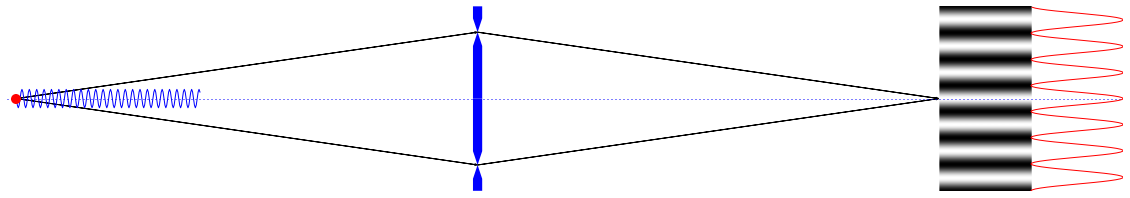

In [4]:
interact(lambda baseline,wavelength:double_slit(x0=[0],baseline=baseline,wavelength=wavelength),
                baseline=(0.1,2,.01),wavelength=(.05,.2,.01))

## Measuring position
Now think about what properties of the light source we could measure with such a device (i.e. by looking at the fringe pattern). Obviously, we could measure source intensity -- but that's not very interesting, since we can measure that by looking at the source directly. Less obviously, we could measure the source position. Observe what happens when we change the source position:

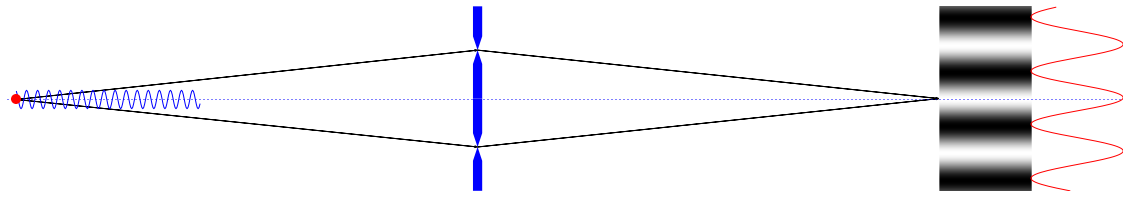

In [5]:
interact(lambda position,baseline,wavelength:double_slit(x0=[position],baseline=baseline,wavelength=wavelength),
               position=(-1,1,.01),baseline=(0.1,2,.01),wavelength=(.05,.2,.01)) and None

Note that long baselines are very sensitive to change in source position, while short baselines are less sensitive. As we'll learn in Chapter 4, the spatial resolution (i.e. the distance at which we can distinguish sources) of an interfrometer is given by $\lambda/B$ , while the spatial resolution of a conventional telescope is given by $\lambda/D$, where $D$ is the dish (or mirror) aperture. This is a fortunate fact, as in practice it is much cheaper to build long baselines than large apertures!

On the other hand, due to the periodic nature of the interference pattern, the position measurement of a long baseline is ambiguous. Consider that two sources at completely different positions produce the same interference pattern:

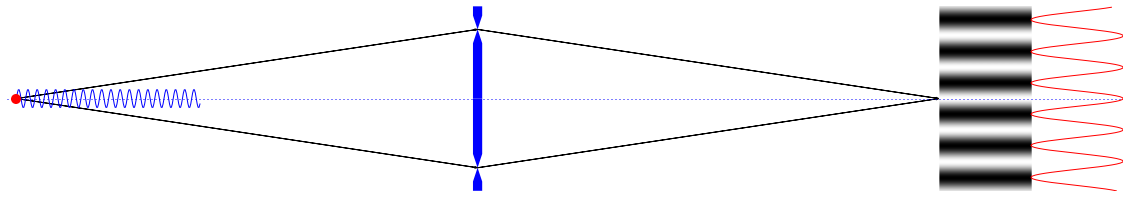

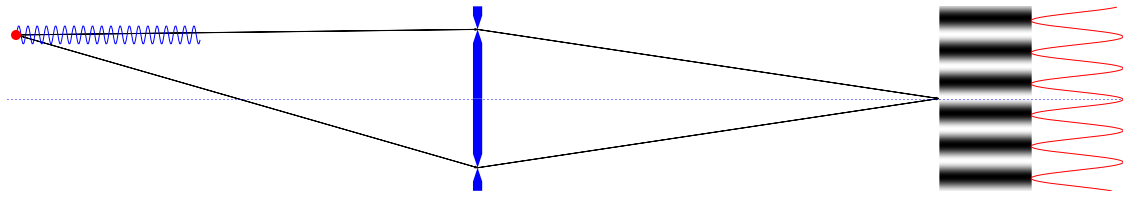

In [6]:
double_slit([0],baseline=1.5,wavelength=0.1)
double_slit([0.69],baseline=1.5,wavelength=0.1)

On the other hand, using a shorter baseline resolves the ambiguity:

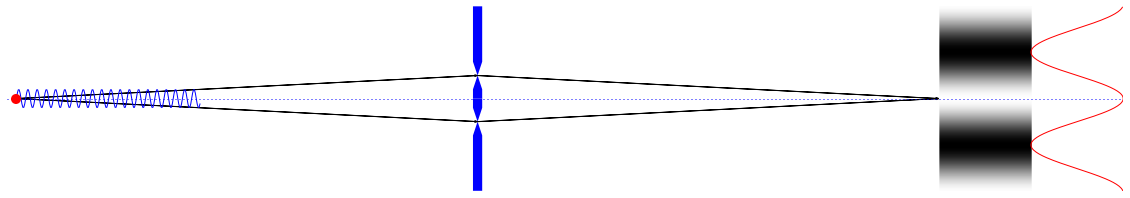

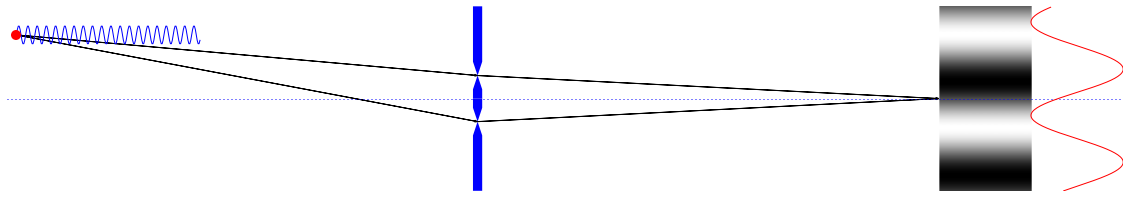

In [7]:
double_slit([0],baseline=0.5,wavelength=0.1)
double_slit([0.69],baseline=0.5,wavelength=0.1)

Modern interferometers exploit this by using an array of elements, which provides a whole range of possible baselines. 

## Measuring size
Perhaps less obviously, we can use an inteferometer to measure source size. Until now we have been simulating only point-like sources. First, consider what happens when we add a second source to the experiment (fortunately, we wrote the function above to accommodate such a scenario). The interference pattern from two (independent) sources is the sum of the individual interference patterns. This seems obvious, but will be shown more formally later on. Here we add a second source, with a slider to control its position and intensity. Try to move the second source around, and observe how the superimposed interference pattern can become attenuated or even cancel out. 

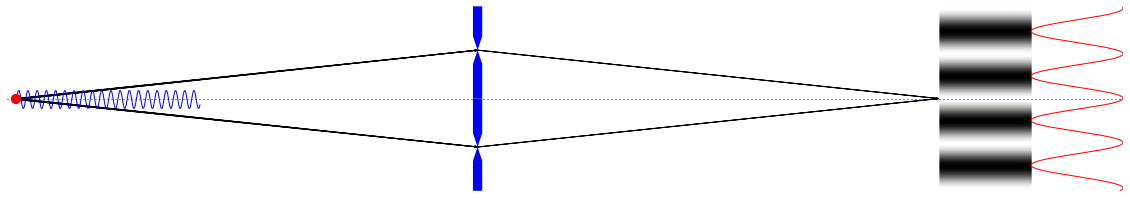

In [8]:
interact(lambda position,intensity,baseline,wavelength:
            double_slit(x0=[0,position],a0=[1,intensity],baseline=baseline,wavelength=wavelength),
         position=(-1,1,.01),intensity=(.2,1,.01),baseline=(0.1,2,.01),wavelength=(.01,.2,.01)) and None

Note that with two sources of equal intensity, it is possible to have the interference pattern almost cancel out on any one baseline -- but never on all baselines at once:

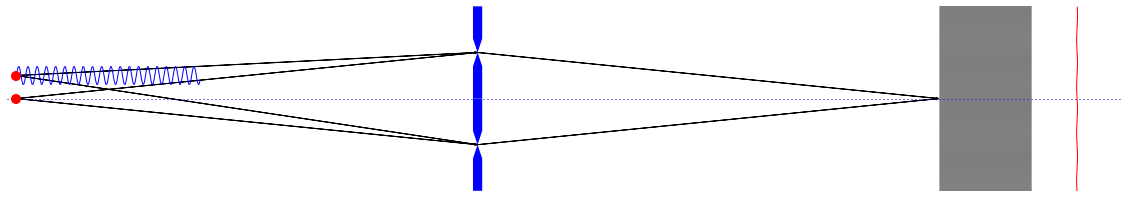

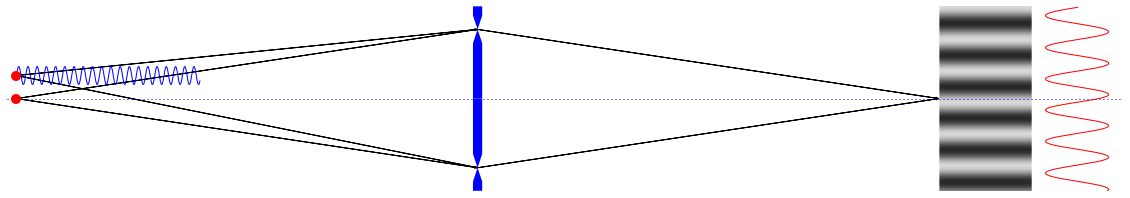

In [9]:
double_slit(x0=[0,0.25],baseline=1,wavelength=0.1)
double_slit(x0=[0,0.25],baseline=1.5,wavelength=0.1)

Now, let us simulate an extended source, by giving the simulator an array of closely spaced point-like sources. Try playing with the extent slider. What's happening here is that the many interference patterns generated by each little part of the extended source tend to "wash out" each other, resulting in a net loss of amplitude in the pattern. Note also how each particular baseline length is sensitive to a particular range of source sizes.

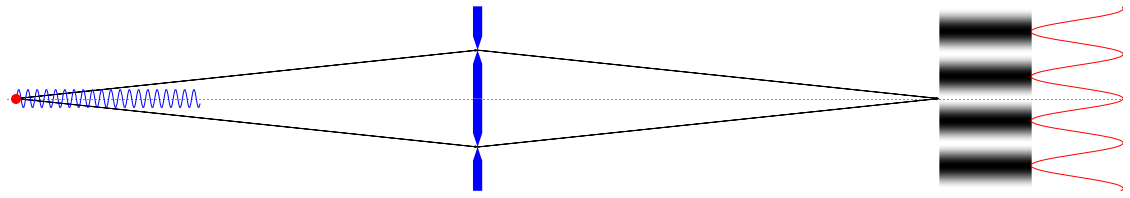

In [10]:
interact(lambda extent,baseline,wavelength:
             double_slit(x0=np.arange(-extent,extent+.01,.01),baseline=baseline,wavelength=wavelength),
         extent=(0,1,.01),baseline=(0.1,2,.01),wavelength=(.01,.2,.01)) and None

We can therefore measure source size by measuring the reduction in the amplitude of the interference pattern:

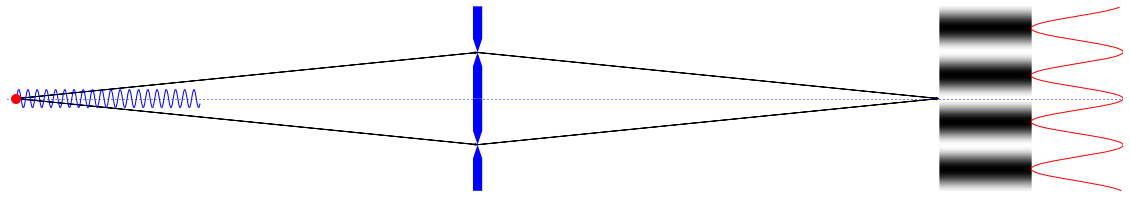

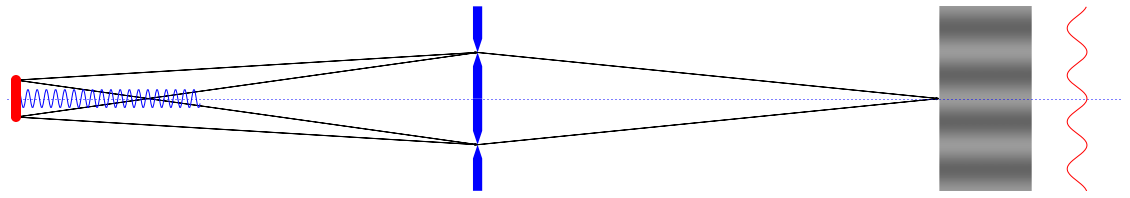

In [11]:
double_slit(x0=[0],baseline=1,wavelength=0.1)
double_slit(x0=np.arange(-0.2,.21,.01),baseline=1,wavelength=0.1)

In fact historically, this was the first application of interferometry in astronomy. In a famous experiment in 1920, a *Michelson interferometer* installed at Mount Wilson Observatory was used to measure the diameter of the red giant star Betelgeuse. 

***

<div class=advice>
The historical origins of the term ***visibility***, which you will become intimately familiar with in the course of these lectures, actually lie in the experiment described above. Originally, "visibility" was defined as just that, i.e. a measure of the contrast between the light and dark stripes of the interference pattern. 

Modern interferometers deal in terms of ***complex visibilities***, i.e. complex quantitities. The amplitude part of a complex visibility, or simply the *visibility amplitude*, corresponds to the intensity of the interference pattern, while the *visibility phase*  corresponds to its relative phase.

In the single-source simulation below, you can clearly see that amplitude encodes source shape (and intensity), while phase encodes source position.

**Visibility phase measures position, amplitude measures shape and intensity.** This is a recurring theme in radio interferometry, one that we'll revisit again and again in subsequent lectures.  
</div>

## Measuring instrument geometry
Until now, we've only been concerned with measuring source properties. Obviously, the interference pattern is also quite sensitive to instrument geometry. We can easily see this in our toy simulator, by playing with the position of the slits and the screen:

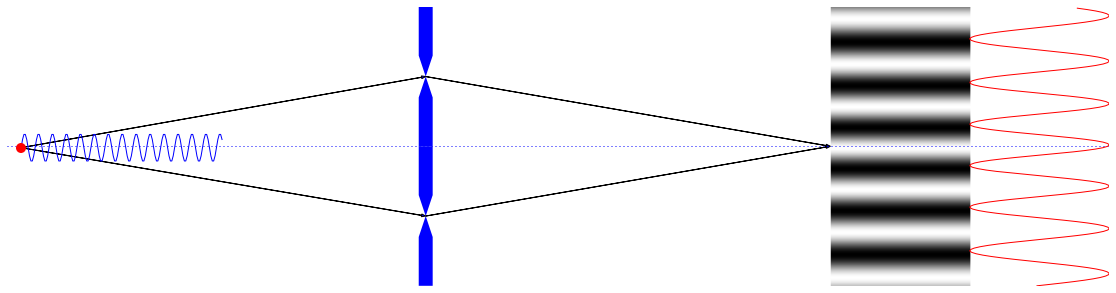

In [12]:
interact(lambda d1,d2,position,extent: double_slit(x0=np.arange(position-extent,position+extent+.01,.01),d1=d1,d2=d2),
         d1=(1,5,.1),d2=(1,5,.1),
         position=(-1,1,.01),extent=(0,1,.01)) and None

This simple fact has led to many other applications for interfeometers, from geodetic VLBI (where continental drift is measured by measuring extremely accurate antenna positions via radio interferometry of known radio sources), to the recent gravitational wave detection by LIGO (where the light source is a laser, and the interference pattern is used to measure miniscule distortions in space-time -- and thus the geometry of the interferometer -- caused by gravitational waves).

## Practical interferometers
If you were given the job of constructing an interferometer for astronomical measurements, you would quickly find that the double-slit experiment does not translate into a very practical design. The baseline needs to be quite large; a box with slits and a screen is physically unwieldy. A more viable design can be obtained by playing with the optical path.

The basic design still used in optical interferometry to this day is the *Michelson stellar interferometer* mentioned above. This is schematically laid out as follows:

<IMG SRC="figures/471px-Michelson_stellar_interferometer.svg.png" width="50%"/>

The outer set of mirrors plays the role of slits, and provides a baseline of length $d$, while the rest of the optical path serves to bring the two wavefronts together onto a common screen. The first such interferometer, used to carry out the Betelgeuse size measurement, looked like this:

<IMG SRC="figures/Hooker_interferometer.jpg" width="50%"/>

In modern optical interferometers using the Michelson layout, the role of the "outer" mirrors is played by optical telescopes in their own right. For example, the Very Large Telescope operated by ESO can operate as an inteferometer, combining four 8.2m and four 1.8m individual telescopes:

<IMG SRC="figures/Hard_Day's_Night_Ahead.jpg" width="100%"/>
(image courtesy of European Southern Observatory).

In the radio regime, the physics allow for more straightforward designs. The first radio interferometric experiment was the sea-cliff interferometer developed in Australia during 1945-48. This used reflection off the surface of the sea to provide a "virtual" baseline, with a single antenna measuring the superimposed signal:

<IMG SRC="figures/sea_int_medium.jpg" width="50%"/>

In a modern radio interferometer, the "slits" are replaced by radio dishes (or collections of antennas called *aperture arrays*) which sample and digitize the incoming wavefront. The part of the signal path between the "slits" and the "screen" is then completely replaced by electronics. The digitized signals are combined in a *correlator*, which computes the corresponding complex visibilities. We will study the details of this process in further lectures. 

Unlike the delicate optical path of an optical interferometer, digitized signals have the advantage of being endlessly and losslessly replicatable. This has allowed us to construct entire intererometric *arrays*. An example is the the Jansky Very Large Array (JVLA, New Mexico, US) consisting of 27 dishes:

<IMG SRC="figures/USA.NM.VeryLargeArray.02.jpg" width="50%"/>

The MeerKAT telescope coming online in the Karoo, South Africa, will consist of 64 dishes. This is an aerial photo showing the dish foundations being prepared:

<IMG SRC="figures/2014_core_02.jpg" width="50%"/>

In an interferometer array, each pair of antennas forms a different baseline. With $N$ antennas, the correlator can then simultaneously measure the visibilities corresponding to $N(N-1)/2$ baselines, with each pairwise antenna combination yielding a unique baseline.



## Aperture synthesis vs. targeted experiments
Interferometry was born as a way of conducting specific, targeted, and rather exotic experiments. The 1920 Betelgeuse size measurement is a typical example. In contrast to a classical optical telescope, which could directly obtain an image of the sky containing information on hundreds to thousands of objects, an interferometer was a very delicate apparatus for indirectly measuring a single physical quantity (the size of the star in this case). The spatial resolution of that single measurement far exceeded anything available to a conventional telescope, but in the end it was always a specific, one-off measurement. The first interferometers were not capable of directly imaging the sky at that improved resolution.

In radio interferometry, all this changed in the late 1960s with the development of the *aperture synthesis* technique by Sir Martin Ryle's group in Cambridge. The crux of this tehnique lies in combining the information from multiple baselines. 

To understand this point, consider the following. As you saw from playing with the toy double-slit simulator above, for each baseline length, the interference pattern conveys a particular piece of information about the sky. For example, the following three "skies" yield exactly the same interference pattern on a particular baseline, so a single measurement would be unable to distinguish between them:

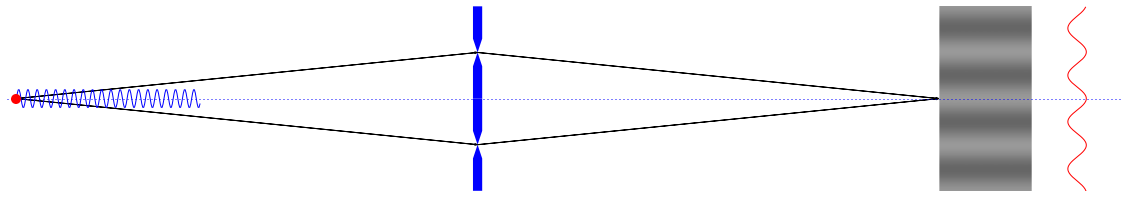

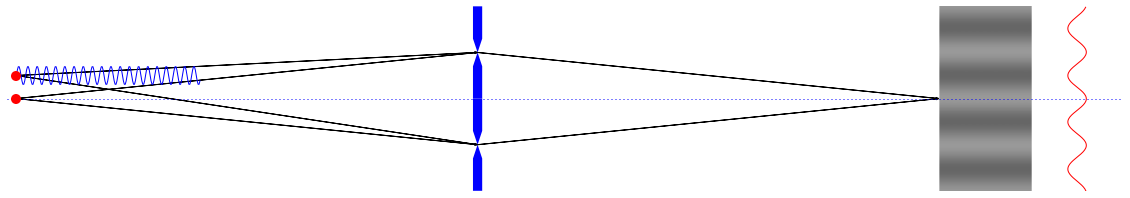

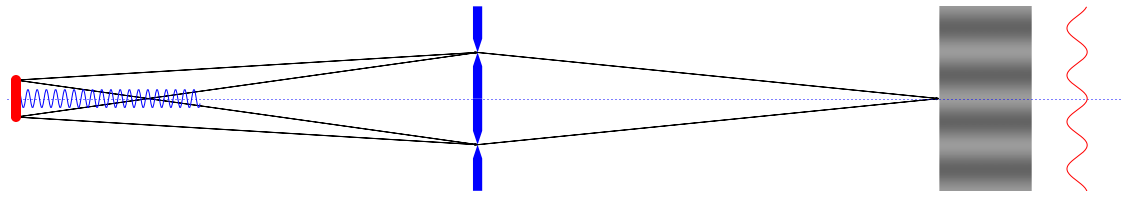

In [13]:
double_slit(x0=[0], a0=[0.4], maxint=2)
double_slit(x0=[0,0.25], a0=[1, 0.6], maxint=2)
double_slit(x0=np.arange(-0.2,.21,.01), a0=.05, maxint=2)

However, as soon as we take a measurement on another baseline, the difference becomes apparent:

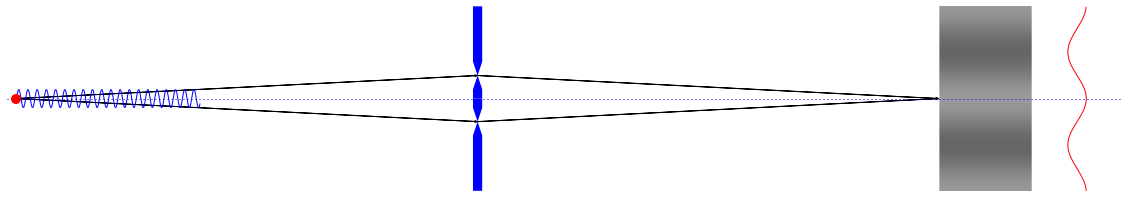

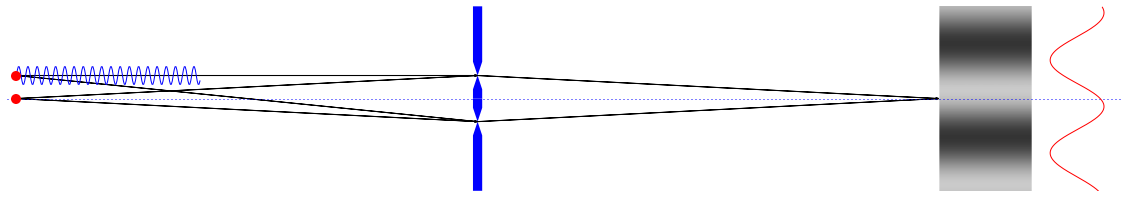

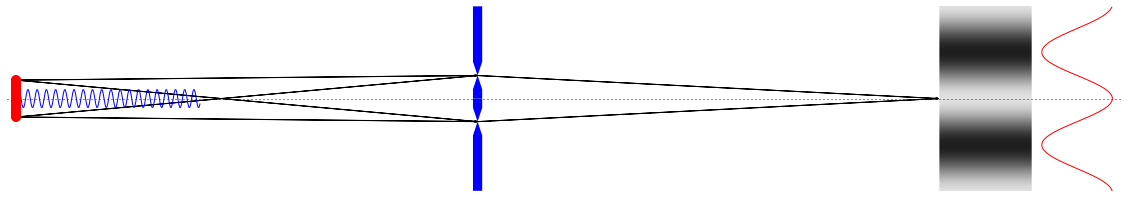

In [14]:
double_slit(x0=[0], a0=[0.4], baseline=0.5, maxint=2)
double_slit(x0=[0,0.25], a0=[1, 0.6], baseline=0.5, maxint=2)
double_slit(x0=np.arange(-0.2,.21,.01), a0=.05,  baseline=0.5, maxint=2)

With a larger number of baselines, we can gather enough information to reconstruct an image of the sky. This is because each baseline essentially measures one *Fourier component* of the sky brightness distribution (Chapter 4 will explain this in more detail); and once we know the Fourier components, we can compute a Fourier transform in order to recover the sky image. The advent of sufficiently powerful computers in the late 1960s made this technique practical, and turned radio interferometers from exotic contraptions into generic imaging instruments. With a few notable exceptions, modern radio interferometry ***is*** aperture synthesis.

This concludes our introduction to radio interferometry; the rest of this course deals with aperture synthesis in detail. The remainder of this notebook consists of a few more interactive widgets that you can use to play with the toy dual-slit simulator.

## Appendix: the double-slit sandbox
The widgets below let you play with various interference patterns.

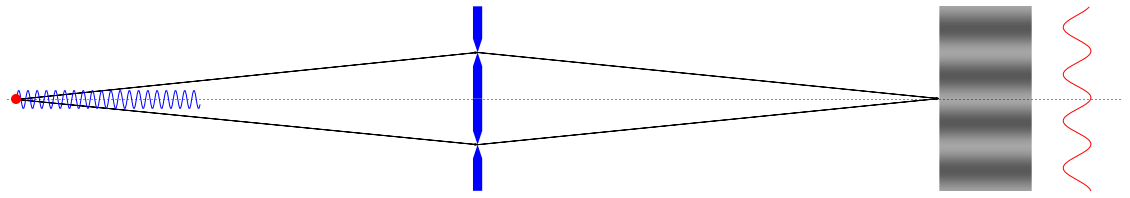

In [15]:
# single source
interact(lambda position, intensity: double_slit(x0=[position], a0=[intensity], maxint=2),
         position=(-1,1,.01),intensity=(.2,1,.01)) and None

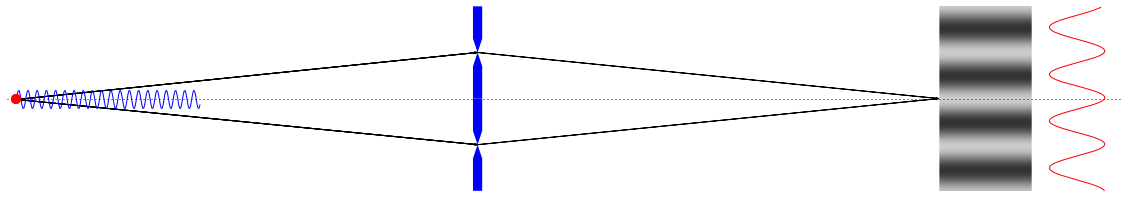

In [16]:
# two sources
interact(lambda position1,position2,intensity1,intensity2: 
            double_slit(x0=[position1,position2], a0=[intensity1,intensity2], maxint=2),
         position1=(-1,1,.01), position2=(-1,1,.01), intensity1=(.2,1,.01), intensity2=(.2,1,.01) ) and None

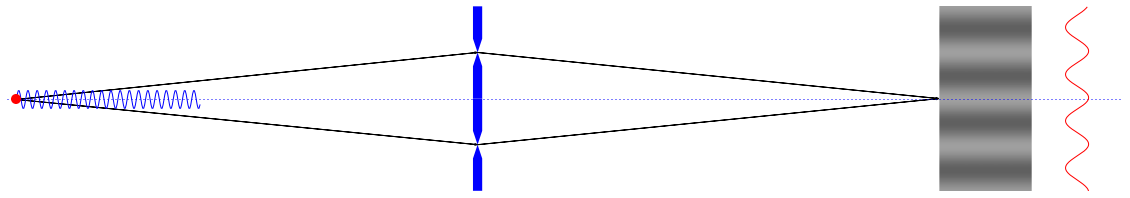

In [17]:
interact(lambda position, extent, intensity: 
             double_slit(x0=np.arange(position-extent,position+extent+.01,.01), a0=intensity, maxint=2),
         position=(-1,1,.01), extent=(0,1,.01), intensity=(0.01,1,.01)) and None